In [77]:
import pandas as pd
df=pd.read_csv('financialindependence2020.2-2021.csv')
df

,Unnamed: 0,author,created_utc,domain,full_link,num_comments,over_18,score,selftext,subreddit,title,num_crossposts
0,0,mazur1984,1589970341,self.financialindependence,https://www.reddit.com/r/financialindependence...,2,False,1,"Posted this on Personal Finance also, sorry if...",financialindependence,Velocity Banking,0
1,1,Henquewl,1589967241,self.financialindependence,https://www.reddit.com/r/financialindependence...,1,False,1,"Guys, what do you think about the following pr...",financialindependence,Improving your financial position through Guap...,0
2,2,Big__Hoss,1589966526,self.financialindependence,https://www.reddit.com/r/financialindependence...,5,False,1,"There is so much information, but I am not sur...",financialindependence,"I am a 19 year old student, what should I focu...",0
3,3,ChrisLJ111,1589963006,self.financialindependence,https://www.reddit.com/r/financialindependence...,0,False,1,[removed],financialindependence,Robert Kiyosaki book (recomendation),0
4,4,AutoModerator,1589962054,self.financialindependence,https://www.reddit.com/r/financialindependence...,45,False,1,Self-promotion (ie posting about projects/busi...,financialindependence,"Weekly Self-Promotion Thread - May 20, 2020",0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,AutoModerator,1611914412,self.financialindependence,https://www.reddit.com/r/financialindependence...,1214,False,1,Please use this thread to have discussions wh...,financialindependence,"Daily FI discussion thread - Friday, January 2...",0
996,996,RobertCameron20,1611910884,self.financialindependence,https://www.reddit.com/r/financialindependence...,0,False,1,[removed],financialindependence,Which is the best business to start amidst COV...,0
997,997,bioimposter,1611899963,self.financialindependence,https://www.reddit.com/r/financialindependence...,0,False,1,I’d love your opinions and feedback on this. I...,financialindependence,Pay off student loans or wait...?,0
998,998,vvelouriaa,1611892979,self.financialindependence,https://www.reddit.com/r/financialindependence...,2,False,1,Wondering how the experience has ben for peopl...,financialindependence,Does anyone have experience buying Bitcoin wit...,0


In [78]:
df2=df.dropna(subset=['title'])[['title','selftext']]
df2 #leave it to anaylze later

,title,selftext
0,Velocity Banking,"Posted this on Personal Finance also, sorry if..."
1,Improving your financial position through Guap...,"Guys, what do you think about the following pr..."
2,"I am a 19 year old student, what should I focu...","There is so much information, but I am not sur..."
3,Robert Kiyosaki book (recomendation),[removed]
4,"Weekly Self-Promotion Thread - May 20, 2020",Self-promotion (ie posting about projects/busi...
...,...,...
995,"Daily FI discussion thread - Friday, January 2...",Please use this thread to have discussions wh...
996,Which is the best business to start amidst COV...,[removed]
997,Pay off student loans or wait...?,I’d love your opinions and feedback on this. I...
998,Does anyone have experience buying Bitcoin wit...,Wondering how the experience has ben for peopl...


In [81]:
#Take interesting columns
df1=df[['selftext','num_comments','score','title']]

#drop duplicate
duplicate = df1.duplicated()
print('There are', duplicate.sum(), 'duplicated values.')
df1=df1.drop_duplicates(subset=['selftext'],keep='first')

#drop those with text=NA
df1=df1.dropna(subset=['selftext'])
#drop meaningless text
df1=df1[(df1.selftext!='[removed]') & (df1.selftext!='[deleted]')]

len(df1)

There are 3 duplicated values.


490

In [82]:
Markov=df1['selftext']

### Convert to lowercase

In [83]:
df1['selftext']=df1['selftext'].str.lower()
df1['selftext']

0      posted this on personal finance also, sorry if...
1      guys, what do you think about the following pr...
2      there is so much information, but i am not sur...
4      self-promotion (ie posting about projects/busi...
5      please use this thread to have discussions whi...
                             ...                        
990    my current company offers a very easy mega-bac...
992    i have never done anything financial in my lif...
994     \n\nplease  use this thread to discuss how am...
997    i’d love your opinions and feedback on this. i...
998    wondering how the experience has ben for peopl...
Name: selftext, Length: 490, dtype: object

### Remove emoji

In [84]:
def remove_emoji(text):
    text = text.encode('ascii', 'ignore').decode()
    return text

In [85]:
df1['selftext']=df1['selftext'].apply(lambda x: remove_emoji(x))
df1['selftext'][0]

"posted this on personal finance also, sorry if it's a double read for some of you!\n\nalright....i'm sure that this won't be well received but i want to know what people think of 'velocity banking' (best video i've seen is titled the method on youtube), whether it works or not, scam/not a scam, and then finally how it compares to just taking your monthly surplus and simply putting it into the market.\n\nquick background, 35 yo, own a house (but will be selling within 6 months to move to japan), wife and 1 child. only debt we have is the mortgage and our monthly spending (no cc, no car payments). \n\nquick financials:\nchecking/savings-16,000\nvanguard ira/brokerage-26,000\ntsp(combined)-120,000\ncurrently have about $500/mo extra (i'm deployed currently, tsp set at 60%), when i get back i'll scale it back and will have more like $1500-2000/mo free.\n\nfeel like we're doing well but would just love to see some conversation for or against velocity banking vs investing vs anything else. 

### Remove url, punctuation, and special characters

In [86]:
#Using regular expression
import re
def remove_other(x):
    x = re.sub("\$"," ", x) #remove $
    x = re.sub("https*\S+", " ", x) #remove url
    x = re.sub("\'\w+", '', x) #remove i'm,we're,let's after the '
    x = re.sub("[0-9]+", '', x) #remove numbers
    return x

In [87]:
df1['selftext']=df1['selftext'].apply(lambda x: remove_other(x))
df1['selftext'][0]

"posted this on personal finance also, sorry if it a double read for some of you!\n\nalright....i sure that this won be well received but i want to know what people think of  banking' (best video i seen is titled the method on youtube), whether it works or not, scam/not a scam, and then finally how it compares to just taking your monthly surplus and simply putting it into the market.\n\nquick background,  yo, own a house (but will be selling within  months to move to japan), wife and  child. only debt we have is the mortgage and our monthly spending (no cc, no car payments). \n\nquick financials:\nchecking/savings-,\nvanguard ira/brokerage-,\ntsp(combined)-,\ncurrently have about  /mo extra (i deployed currently, tsp set at %), when i get back i scale it back and will have more like  -/mo free.\n\nfeel like we doing well but would just love to see some conversation for or against velocity banking vs investing vs anything else. let open it up."

### Remove stopwords

In [88]:
import nltk
from nltk.corpus import stopwords
#nltk.download("stopwords") #uncomment it when run it for the first time
stop_words = set(stopwords.words("english"))
print(stop_words) #all preloaded stopwords

{'whom', 'shan', 'how', "aren't", 'hasn', 'ours', 'further', 'on', 've', "wasn't", 'all', "shan't", 'some', 'he', 'itself', 'yourself', "it's", 'which', 'these', 'such', 'ma', "shouldn't", 'wouldn', 'just', 'there', 'myself', 'wasn', 'him', "didn't", "hasn't", 'when', "should've", 'hadn', 'being', 'their', 'yours', 'down', 'or', 'been', 'they', 'each', 'those', 't', 'here', 'ain', 'she', 'because', 'that', 'what', 'it', 'we', 'below', 'only', "hadn't", "needn't", 'then', 'both', 'will', 'do', 'can', 'now', "haven't", 'most', 'themselves', "that'll", 'y', 'ourselves', 'theirs', 'the', 'into', 'o', 'own', 'once', 'of', 'haven', "you'll", "couldn't", 'its', "isn't", 'yourselves', 're', 'very', 'hers', "you'd", 'between', 'with', "you're", 'were', 'mightn', 's', 'to', 'until', 'nor', "doesn't", "wouldn't", 'me', "she's", 'who', 'this', 'while', 'more', 'didn', 'your', "weren't", 'after', 'so', 'weren', 'against', 'them', 'was', 'herself', 'as', 'but', 'few', 'doing', 'if', 'isn', 'is', 'be

In [89]:
def remove_stopwords(text):
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

In [90]:
df1['selftext']=df1['selftext'].apply(lambda x: remove_stopwords(x))
df1['selftext'][0]

"posted personal finance also, sorry double read you! alright....i sure well received want know people think banking' (best video seen titled method youtube), whether works not, scam/not scam, finally compares taking monthly surplus simply putting market. quick background, yo, house (but selling within months move japan), wife child. debt mortgage monthly spending (no cc, car payments). quick financials: checking/savings-, vanguard ira/brokerage-, tsp(combined)-, currently /mo extra (i deployed currently, tsp set %), get back scale back like -/mo free. feel like well would love see conversation velocity banking vs investing vs anything else. let open up."

In [91]:
spec_chars = ["!",'“','"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df1['selftext'] = df1['selftext'].str.replace(char, ' ')
    df1['selftext'] = df1['selftext'].str.split().str.join(" ")
df1['selftext']

0      posted personal finance also sorry double read...
1      guys think following project guap strategy fun...
2      much information sure information applies sinc...
4      self promotion ie posting projects businesses ...
5      please use thread discussions feel warrant new...
                             ...                        
990    current company offers easy mega backdoor roth...
992    never done anything financial life besides ban...
994    please use thread discuss amazingly cheap are ...
997    id love opinions feedback this k federal stude...
998    wondering experience ben people buying bitcoin...
Name: selftext, Length: 490, dtype: object

### Check the resulting text to see whatelse we need to clean

In [92]:
df1['selftext'][4]

'self promotion ie posting projects businesses operate profit from typically practice discouraged r financialindependence posts removed moderation thread rules do not apply however please post referral links thread use thread talk blog talk business ask feedback etc self promotion starts leak outside thread return time self promotion posts banned please use space wisely link only posts removed put effort it'

### Example of Lemmatization(change rules to rule)

In [93]:
import nltk
#nltk.download('wordnet') #uncommented for 1st time running
from nltk.stem import WordNetLemmatizer

words=df1['selftext'][4].split()
lemmatizer = WordNetLemmatizer()
for word in words:
    print(word + " ---> " + lemmatizer.lemmatize(word))

self ---> self
promotion ---> promotion
ie ---> ie
posting ---> posting
projects ---> project
businesses ---> business
operate ---> operate
profit ---> profit
from ---> from
typically ---> typically
practice ---> practice
discouraged ---> discouraged
r ---> r
financialindependence ---> financialindependence
posts ---> post
removed ---> removed
moderation ---> moderation
thread ---> thread
rules ---> rule
do ---> do
not ---> not
apply ---> apply
however ---> however
please ---> please
post ---> post
referral ---> referral
links ---> link
thread ---> thread
use ---> use
thread ---> thread
talk ---> talk
blog ---> blog
talk ---> talk
business ---> business
ask ---> ask
feedback ---> feedback
etc ---> etc
self ---> self
promotion ---> promotion
starts ---> start
leak ---> leak
outside ---> outside
thread ---> thread
return ---> return
time ---> time
self ---> self
promotion ---> promotion
posts ---> post
banned ---> banned
please ---> please
use ---> use
space ---> space
wisely ---> wisely

In [94]:
def lemmatize(words):
    lemmatizer = WordNetLemmatizer()
    nwords=[]
    for word in words:
        word=lemmatizer.lemmatize(word)
        nwords.append(word)
    return ' '.join(nwords)

In [95]:
df1['selftext']= df1['selftext'].str.split().apply(lambda x: lemmatize(x))
df1['selftext'][4]

'self promotion ie posting project business operate profit from typically practice discouraged r financialindependence post removed moderation thread rule do not apply however please post referral link thread use thread talk blog talk business ask feedback etc self promotion start leak outside thread return time self promotion post banned please use space wisely link only post removed put effort it'

### Split words

In [96]:
from sklearn.feature_extraction.text import CountVectorizer

In [97]:
vec=CountVectorizer()
counts=vec.fit_transform(df1['selftext'])
counts=counts.toarray()
count_df=pd.DataFrame(counts,columns=vec.get_feature_names())
big_df=pd.concat((df1,count_df),axis=1)
big_df.head()

,selftext,num_comments,score,title,aa,aapl,abandon,abandoned,ability,able,...,youth,youtube,youtuber,youtubers,youve,yr,yuan,zerion,zero,zillow
0,posted personal finance also sorry double read...,2.0,1.0,Velocity Banking,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,guy think following project guap strategy fund...,1.0,1.0,Improving your financial position through Guap...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,much information sure information applies sinc...,5.0,1.0,"I am a 19 year old student, what should I focu...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,self promotion ie posting project business ope...,45.0,1.0,"Weekly Self-Promotion Thread - May 20, 2020",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
# List of all words across rows
import itertools
import collections
def count_words(text):
    all_words = list(itertools.chain(*text.str.split()))
    counts = collections.Counter(all_words)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])

    return counts_df
count_words(df1['selftext'])

,words,count
0,k,657
1,year,603
2,money,408
3,would,336
4,time,313
...,...,...
95,question,78
96,every,78
97,post,77
98,etc,76


In [99]:
stop_words.update({'would','k','im','could','also','amp','much','one','like','get','since'})
df1['selftext']=df1['selftext'].apply(lambda x: remove_stopwords(x))
count_df=count_words(df1['selftext'])
count_df.head(30)

,words,count
0,year,603
1,money,408
2,time,313
3,account,248
4,job,216
5,work,206
6,saving,181
7,want,177
8,know,176
9,fire,176


In [100]:
import plotly.express as px
fig = px.bar(count_df.head(10), x='words', y='count', title="Top 10 words in Financial Independence")
fig.show()

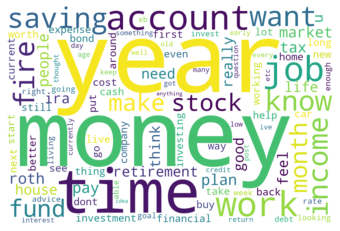

In [101]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=' '.join(count_df.words)

# Create the wordcloud object
wordcloud = WordCloud(width=1500, height=1000, margin=0,background_color='white').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### Two grams Frequency

In [102]:
from nltk.util import ngrams
def count_2gram(text):
    all_words = list(itertools.chain(*text.str.split()))
    esBigrams = ngrams(all_words, 2)
    counts = collections.Counter(esBigrams)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])
    dictionary2 = [' '.join(tup) for tup in counts_df.words]
    counts_df.words=dictionary2

    return counts_df
counts_df2=count_2gram(df1['selftext'])
counts_df2.head(20)

,words,count
0,roth ira,76
1,year old,49
2,net worth,47
3,brokerage account,45
4,emergency fund,44
5,next year,40
6,saving account,38
7,index fund,35
8,stock market,34
9,long term,33


In [103]:
fig = px.bar(counts_df2.head(10), x='words', y='count', title="Top 10 2-grams in Financial Independence")
fig.show()

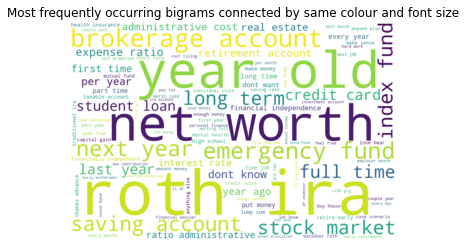

In [104]:
words_dict = dict(counts_df2.values)

wordCloud = WordCloud(max_words=200, height=1000, width=1500,background_color='white')
wordCloud.generate_from_frequencies(words_dict)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Three Gram Frequency

In [139]:
def count_3gram(text):
    all_words = list(itertools.chain(*text.str.split()))
    esBigrams = ngrams(all_words, 3)
    counts = collections.Counter(esBigrams)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])
    dictionary3 = [' '.join(tup) for tup in counts_df.words]
    counts_df.words=dictionary3

    return counts_df
counts_df3=count_3gram(df1['selftext'])
counts_df3.head(20)

,words,count
0,expense ratio administrative,20
1,ratio administrative cost,20
2,working full time,9
3,worst case scenario,8
4,part time job,8
5,credit card debt,7
6,work part time,7
7,full time job,7
8,yield saving account,6
9,roth ira account,6


### Try Markov Chain to generate synthetic text

In [27]:
import random
def markov_text(s, n, seed,length):
    '''
    Generates synthetic text according to an n-th order Markov model
    Parameter s: input string of real text
    Parameter n: integer n, the order of the model
    Parameter seed: the initial string that gets the Markov model started.
    Parameter length: integer, the size of the text to generate. default=100
    '''
    counts = count_ngrams(s, n+1)
    fake=seed
    for i in range(length):
        previous = fake[(-n):]
        # filter dict to keep only matching grams
        sub = {}
        for key in counts:
            if key[:-1] == previous: 
                sub[key] = counts[key]
    # convert to lists for use with random.choices
        choices = list(sub.keys())
        weights = [sub[key] for key in choices]
        new_gram = random.choices(choices, weights)[0]
        new_char = new_gram[-1]
        fake+=new_char
    return fake 

In [28]:
def count_ngrams(s,n=1):
    '''
    Counts the number of times each n-gram occurs in a string 's'
    Parameter s: input string
    Parameter n: input integer n to specify 'n-gram' that need to be count
    '''
    D={}
    #loop through s, untill there are not enough characters left forming n-gram
    for i in range(len(s)-(n-1)): 
        D[s[i:i+n]]=0 # initialize values to avoid key errors
    for i in range(len(s)-(n-1)):
        D[s[i:i+n]]+=1 #the value of each n-gram is their counts in s
    return D

{'to': 2, 'or': 1, 'rt': 1, 'oi': 1, 'is': 1, 'se': 1}

In [29]:
import itertools
all_words = list(itertools.chain(*Markov.str.split()))
s=' '.join(all_words)

In [30]:
#markov_text(s, n = 8, length = 400, seed = "roth ira")

'roth ira goal plan reading strong found lucrative sibling poverty looking anyway shoot hole plan buy home area dc md va mean definitely wanna live home parent rent freedom real story family three year living expensive business school buddy health care working lt hr week commsec doesnt really though net worth working anything time goal mine dont really help others math doesnt show still scary hell everythi'

In [31]:
#markov_text(s, n = 10, length = 400, seed = "healthcare")

'healthcare pretty important part plan plan stop making interest earnings per share portfolio etc anyone done synthetic mortgage bought around dollar instead assuming market expense asset hsa set work plan continue max ira reduce agi thus monthly loan payment maximizing net worth best case scenario ef investor forced sell stock low price market feel free point thanks g hi guy usa looking sustainable withdraw'

### Check the content of most frequent words/2-grams

In [105]:
import numpy as np
index=df1[df1['selftext'].str.contains("roth ira")].index
index

Int64Index([ 10,  12,  27,  43,  81,  86, 180, 191, 219, 223, 237, 241, 286,
            318, 350, 385, 395, 421, 441, 466, 467, 482, 494, 502, 505, 542,
            547, 550, 559, 571, 572, 594, 599, 603, 631, 650, 692, 804, 811,
            843, 865, 869, 898, 919, 922, 938, 960, 965],
           dtype='int64')

In [106]:
df.iloc[index]['selftext'][350]

"Hello friends, long time commenter, first time poster. \n\nme: 37, 150k in ROTH/IRAs, 10k in cash. Good steady job, moderate expenses (2-3k a mo), target retirement in about 15 years. \n\ntypical plan: continue to max out IRAs, build to 25k in cash savings, then start plowing excess into VSTAX(or whatever similar vehicle).\n\nConsidering modification: while expenses are currently lower (1.7k-2.5k) start buying into vehicle now, while doing less in savings. right now I get about 2k a month that I'm putting into savings, but I'm considering 1k a month in savings and 1k in VSTAX.  \n\n\nwildcard: career is cyclical in nature, so I fairly regularly am without inflow. current job is permanent, but not funded beyond June 2021 (working on that), so that savings will be tapped then to fill the gaps, but I feel like if I put it in a money market I could basically tap that if I had to and pay cap gains. \n\n&amp;#x200B;\n\nthoughts? what's my play?"

[43]: Im currently considering opening a ROTH IRA account but I don’t really know what to put in it

[81]:I'm still on the fence about opening a Roth IRA since having future earned income to contribute can't be guaranteed. And because of this I've considered withdrawing all $5,700, taking the penalty fees and reinvest what I’m left with.

[86]: The author recommends to invest in the Vanguard Total Stock Market Index Fund (VTSAX) and states that when you can live off the dividends VTSAX provides, you are financially free. Does anyone here do this? Do you think the author here is specifically talking about a taxable brokerage account that isn't a Roth IRA?

[191]: Does this plan provide a good/secure return (beyond if I was just straight investing into the vanguard mutual funds directly)? Would I be paying taxes from withdrawing from brokerage to the Vanguard, then again when I withdraw this for final use? Should I do this with a ROTH IRA or 401K instead?

[241]: Given this situation, am I allowed to deduct an additional 3000 from my IRA contribution, or is my best bet to roll it all into a Roth IRA without taking a deduction?

[286]:If I do an IRA to Roth IRA conversion, do I have to wait 5 years before I can withdraw any of the converted amount (without penalty) even if I’m over 59 ½?

[350]: 150k in ROTH/IRAs..

In [130]:
index1=df1[df1['selftext'].str.contains("brokerage account")].index
index1

Int64Index([ 10,  12,  86, 194, 276, 284, 289, 318, 353, 416, 421, 433, 466,
            530, 531, 538, 554, 571, 572, 667, 680, 793, 805, 842, 846, 875,
            935, 938, 959, 965],
           dtype='int64')

In [129]:
df.iloc[index1]['selftext'][842]

'I thought I’d ask all the big brains on here your thoughts on this. \n\nI personally believe that current tax rates are unsustainably low (they’ll go up before long). I also save plenty for retirement, other long term obligations and have an emergency fund. I have plenty of room in my marginal tax bracket to absorb the extra “income” at my current marginal tax rate. \n\nI’m considering a withdrawal through this law change and would deposit the $ into a taxable brokerage account for flexibility in investing opportunities, bigger emerg fund (I am at a start up), debt pay down, etc. \n\nWhat am I missing? I have read the articles saying don’t do this, but they’re all predicated on the person squandering the money, not investing it.'

[194]: We have a brokerage account with Schwab with $40k in it and fully funded IRA's, should we be pouring money into this brokerage account right now or a high yield savings account?

[276]:I currently have active retirement/brokerage accounts and am looking solely for what is the best way to maximize the inheritance for my brother and I. I prefer to invest using Vanguards indexs for total US market, total international market and bonds, with the equity risk following the 120-age rule.

[284]:However my tax preparer stated since I didn’t use pre-tax dollars I could not claim the deduction. If that’s the case what’s the benefit of a traditional IRA over a brokerage account?

In [151]:
index2=df1[df1['selftext'].str.contains("emergency fund")].index
index2

Int64Index([ 10,  12,  18,  49, 180, 204, 222, 223, 265, 353, 461, 466, 559,
            567, 603, 837, 842, 861],
           dtype='int64')

In [153]:
df.iloc[index2]['selftext'][204]

'Hi guys, long time lurker here! I’ve been pondering this dilemma for the past few days and since I’ve learned much of what I know from this sub, I would like to ask the collective wisdom here for input.\n\nI will be receiving a substantial annual bonus in about a week’s time + my normal salary. This will equate to about roughly 6.6 months worth of normal take home pay. What would you do with this money given the current market condition?\n\nNow I am not unfamiliar with all the existing research that compares the performance of DCA vs Lump Sum over time and I know the data shows that 66% or more of the time, lump sum beats DCA as the market usually goes up and DCA just means you’re taking risk later so on average you’ll do worse than lump sum over all possible investing periods.\n\nHowever we all hear that the current market drop is just starting due to the corona virus and most people intuitively feel that the market has more to fall over the next few months AND it could trigger a rec

[961]:I want to be able to pull some money out if needed for an emergency fund but don’t like having so much just sitting not making interest. 

[842]: I’m considering a withdrawal through this law change and would deposit the $ into a taxable brokerage account for flexibility in investing opportunities, bigger emerg fund (I am at a start up), debt pay down, etc. \n\nWhat am I missing? I have read the articles saying don’t do this, but they’re all predicated on the person squandering the money, not investing it.

In [134]:
index3=df1[df1['selftext'].str.contains("index fund")].index
index3 #Vanguard index fund account

Int64Index([ 26,  86, 153, 202, 213, 223, 252, 273, 280, 294, 299, 416, 453,
            458, 494, 504, 567, 588, 599, 603, 645, 828, 931, 938, 963],
           dtype='int64')

In [138]:
df.iloc[index3]['selftext'][599]

"Other than what I have in checking (for monthly and emergency expenses), I have the rest of my savings in a High Yield Savings Account. I have multiples because the insurance limit is $250,000. However, they are collecting at only 0.80% APR at the moment so I am considering transferring them into my existing Vanguard index fund account. \n\nMy goals and stats about me: \n\n1. My checking covers my current monthly expenses ($1500) and a short term emergency buffer ($1000)\n2. I will need to withdraw $50,000 in the next 2 to 5 years to purchase a house if the mortgage rate is low enough. If not, I buy in cash \n3. I aim to passively grow my savings (1m) and I will NOT touch this money for a very very very long time. As I am quite tech savvy, I will be checking this periodically and do not need a finance manager\n4. I have maxed out my 403(b) and Roth IRA account every year. I will also not touch this for a very very very long time. \n5. I have started a Vanguard index fund account ($300

[828]:Both books were great to get me started off right with FI. Bogle convinced me on the merit of index funds and Collins laid out the path to FI in very broad stokes. \n\nNow I’ve paid off all my debt, bought a house, and have been getting my 401k match and investing it in US stock index funds.Now that my debt is paid off and I’m done saving for a house, I have a lot more to invest and don’t have a comprehensive strategy for what buckets to put my money into and in what order. \n\nIn addition to learning more about FI investment strategies and order of operations with investment accounts, I’d like to gain more literacy on things like Roth conversions/ backdoor Roths.

In [140]:
index4=df1[df1['selftext'].str.contains("stock market")].index
index4

Int64Index([  8,  19,  77,  86, 180, 202, 249, 252, 273, 319, 370, 467, 495,
            499, 542, 545, 547, 565, 567, 588, 595, 643, 798, 843, 912, 917,
            944, 945],
           dtype='int64')

In [154]:
df.iloc[index4]['selftext'][643]

'Hey folks, just a background on myself:\n\nGrew up in a poor family.  Got myself to college with loans in STEM degree and have grinded my way to a well paying job.  i’ve always paid off all my debts as soon as i can and i always save up money on a roth and 401k every month.  i lived very frugally.  Bought a small house in my late 20s after saving up for a down payment.\n\nEventually got married to someone with 200k  (7% interest) medical school debt.  we fought occasionally about finances with my mortgage and her loans - but eventually she got a decent job and we had an aggressive plan to pay it all off in 4 years and we did it but living frugally and paying aggressively.  Mid 30s now with maybe 300K in retirement, 20k maybe in our banks but at least we were free of the medical school debt.\n\nthen we had a kid.  she quit her job.  finances went even harder now and we fight all the time - kids will ruin that connection between two folks quick.  we weren’t happy\n\nthen 2020 was a weir

Late 20s, know nothing about stock market investing 

[843]:1. Thoughts on the above for 401(k)/IRA?\n2. Should I keep my taxable accounts in line with my tax-preferred accounts?\n3. Should I even purchase bonds at my age? And if I do, would something like 5% even mean much in a total bond fund?   \n \n\nI'm not an expert in investing, so that's why I'm looking for this advice. I could be overlooking something that one of you may pick up on quickly. I've just focused on minimizing costs and investing money that I've had leftover.

[542]:Is anyone else struggling what to do with their FI/RE money? Either in terms of how to spend/invest or better utilize it? 

In [148]:
index5=df1[df1['selftext'].str.contains("time")].index
index5

Int64Index([  4,   8,   9,  15,  18,  26,  27,  29,  36,  52,
            ...
            955, 962, 965, 966, 972, 974, 976, 981, 983, 992],
           dtype='int64', length=165)

In [150]:
df.iloc[index5]['selftext'][18]

"For the better part of 2 years now I've been lurking about and taking the subreddit's lessons towards making small improvements to my (and my wife's) financial discipline and situation. We've made some real small-time progress and I'm very proud of us, but we've constantly struggled to grow our savings account before something wipes it out. We've yo-yo'ed between 1-2 months emergency funds during this process constantly, while making some progress on debts. So overall, forward motion!\n\nFlash forward to today. Due to the sad reality of Covid-19 America,  I'm furloughed and her hours have been cut in half. I've been drawing unemployment since my furlough began (first time ever in my life) and she just got her first unemployment deposits today. Due to the CARES act, we're making significantly more income in this situation than we were while working. As a result, we've been banking a lot of extra cash (for us).\n\nToday we surpassed the largest amount we've ever saved up before (previou